In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

In [2]:
# загрузим данные
df = pd.read_csv('../../data/values_from_the_instrument.csv')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


<Axes: xlabel='x1', ylabel='x2'>

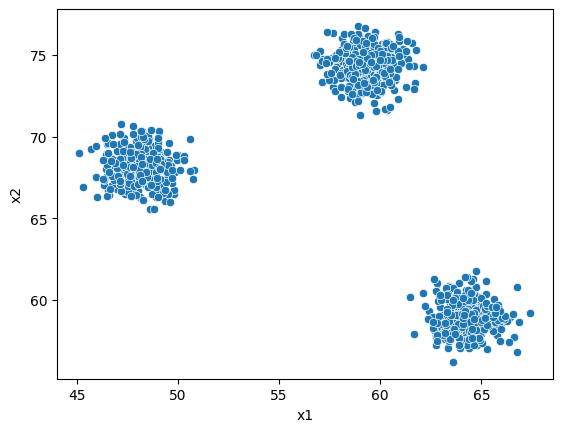

In [3]:
#визуализируем
sns.scatterplot(x=df.x1, y=df.x2)

<Axes: xlabel='x1', ylabel='x2'>

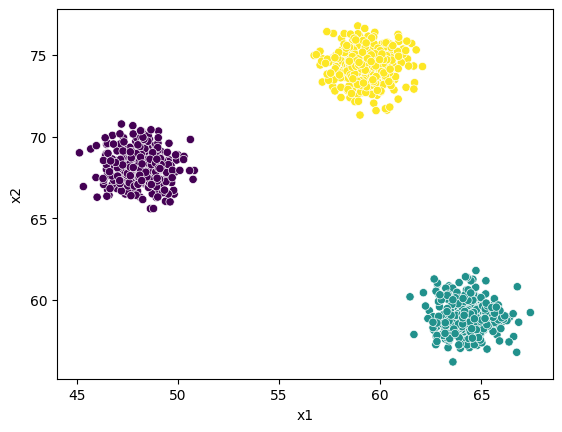

In [5]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(df)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(df)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.x1, y=df.x2, c=predictions)

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\skle

<Axes: xlabel='cluster', ylabel='inertia'>

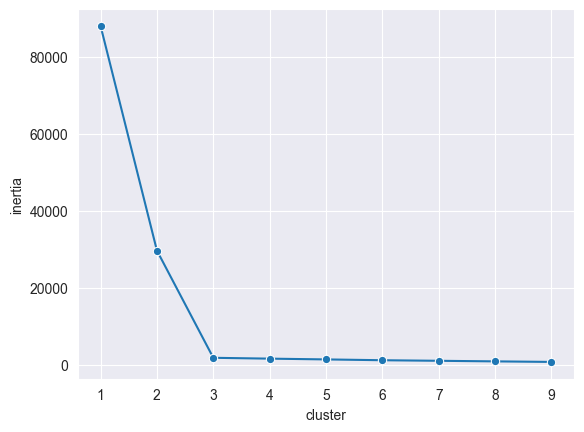

In [6]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}

# выберем нужные данные 
X = df[['x1', 'x2']]

# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, X))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

<Axes: xlabel='cluster', ylabel='silhouette'>

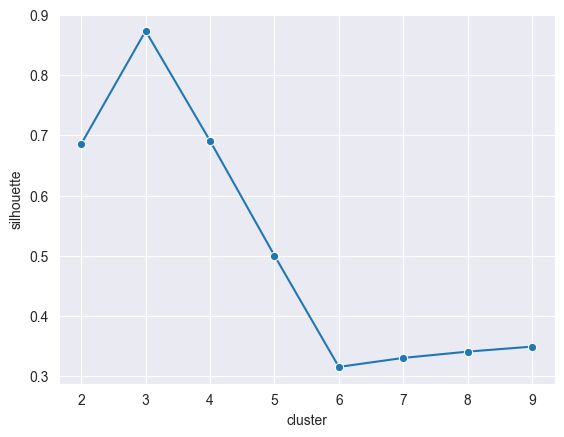

In [7]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['x1', 'x2']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")